# make a House prediction model

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [29]:
df = pd.read_csv("homeprices.csv")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


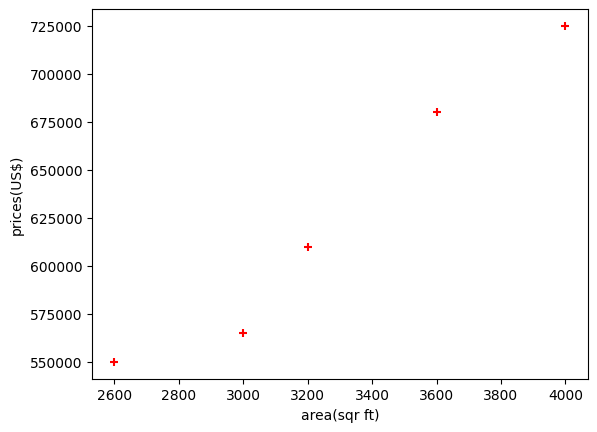

In [30]:
%matplotlib inline
plt.xlabel('area(sqr ft)')
plt.ylabel('prices(US$)')
plt.scatter(df.area, df.price, color='red', marker='+')

In [31]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']], df.price)

LinearRegression()

In [32]:
reg.predict([[50000]])

c:\Users\sanjo.SANJOG\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([6970000.])

In [33]:
reg.coef_

array([135.78767123])

In [34]:
reg.intercept_

180616.43835616432

In [35]:
reg.coef_*3300+reg.intercept_

array([628715.75342466])

predict the data with the help of our trined model

In [36]:
pred = pd.read_csv("predictedPrices.csv")
pred

,area
0,900
1,1000
2,1200
3,1600
4,2000
5,2200
6,2300
7,2500
8,3100
9,3300


predict

In [37]:
prices = reg.predict(pred)
prices

array([302825.34246575, 316404.10958904, 343561.64383562, 397876.71232877,
       452191.78082192, 479349.31506849, 492928.08219178, 520085.61643836,
       601558.21917808, 628715.75342466, 683030.82191781, 710188.35616438,
       737345.89041096, 750924.65753425, 764503.42465753])

add the predicted column in the dataframe

In [38]:
pred['price'] = prices
pred

,area,price
0,900,302825.342466
1,1000,316404.109589
2,1200,343561.643836
3,1600,397876.712329
4,2000,452191.780822
5,2200,479349.315068
6,2300,492928.082192
7,2500,520085.616438
8,3100,601558.219178
9,3300,628715.753425


make a new csv file with the area and the predicted price

In [39]:
pred.to_csv('predictHousePrices.csv', index=False)

graph of new trained data

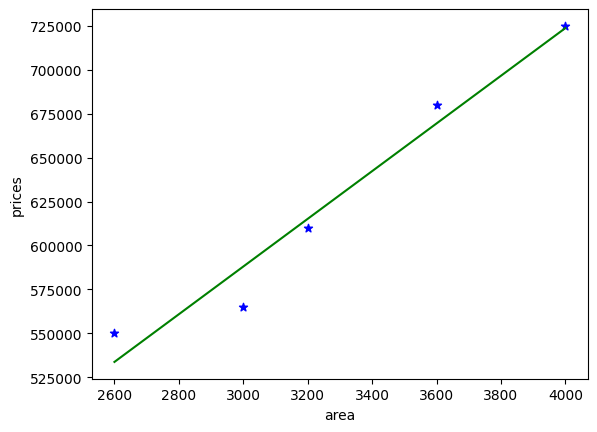

In [40]:
%matplotlib inline
plt.xlabel('area')
plt.ylabel('prices')
plt.scatter(df.area, df.price, color='blue', marker='*')
plt.plot(df.area, reg.predict(df[['area']]), color='green')

graph of the predicted prices

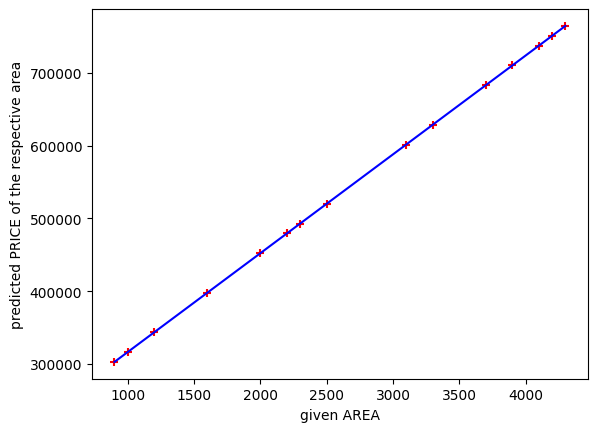

In [41]:
%matplotlib inline
plt.xlabel('given AREA')
plt.ylabel('predicted PRICE of the respective area')
plt.scatter(pred.area, pred.price, color='red', marker='+')
plt.plot(pred.area, pred.price, color='blue')

Using pickle make and load model

In [42]:
import pickle

In [43]:
with open("house_model", "wb") as f:
    pickle.dump(reg, f)

with open("house_model", "rb") as f:
    mp = pickle.load(f)

In [44]:
mp.predict([[3000], [5000]])

c:\Users\sanjo.SANJOG\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([587979.45205479, 859554.79452055])

Using joblib make and laod model

In [47]:
import joblib

In [52]:
joblib.dump(reg, "house_model_joblib")
mj = joblib.load("house_model_joblib")

In [53]:
mj.predict([[3000], [4000], [5000], [6000]])

c:\Users\sanjo.SANJOG\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([587979.45205479, 723767.12328767, 859554.79452055, 995342.46575342])